# Inference

Define a specific triangle with these three ordered angles:
{X: A = 85° >= B = 50° >= C = 45°, where A + B + C = 180°}

In [1]:
a = 85
b = 50
c = 45

In [2]:
# for I triangle
mu_i = 1 - (1/60) * min(a-b, b-c)
print(mu_i)

0.9166666666666666


In [3]:
# for R triangle
mu_r = 1 - (1/90) * abs(a-90)
print(mu_r)

0.9444444444444444


In [4]:
# for IR triangle
# IR = I intersection R
mu_ir = 1 - max([
    (1/60) * min(a-b, b-c), (1/90) * abs(a-90)
])
print(mu_ir)

0.9166666666666666


In [5]:
# for E triangle
mu_e = 1 - (1/180) * (a - c)
print(mu_e)

0.7777777777777778


In [6]:
# for T triangle
# T = I intersection R intersection E
mu_t = (1/180) * min([
    3*(a-b), 3*(b-c), 3*abs(a-90), a-c
])
print(mu_t)

0.08333333333333334


# Rank ordering

Suppose 1000 people respond to a questionnaire about their pairwise preferences among five colors, 
X = {red, orange, yellow, green, blue}. 
Define a fuzzy set as A on the universe of colors “best color.”

In [7]:
red_preference = [0, 517, 525, 545, 661]
orange_preference = [483, 0, 841, 477, 576]
yellow_preference = [475, 159, 0, 534, 614]
green_preference = [455, 523, 466, 0, 643]
blue_preference = [339, 424, 386, 357, 0]

In [8]:
import pandas as pd
from matplotlib import pyplot as plt

In [9]:
colors = ['red', 'orange', 'yellow', 'green', 'blue']
preferences = [
    red_preference,
    orange_preference,
    yellow_preference,
    green_preference,
    blue_preference
]

rank_ordering = pd.DataFrame(
    data=preferences,
    index=colors,
    columns=colors
)

In [10]:
rank_ordering['total'] = rank_ordering.sum(axis=1)

print(rank_ordering)

        red  orange  yellow  green  blue  total
red       0     517     525    545   661   2248
orange  483       0     841    477   576   2377
yellow  475     159       0    534   614   1782
green   455     523     466      0   643   2087
blue    339     424     386    357     0   1506


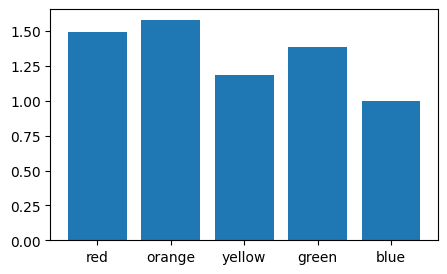

In [11]:
total_norm = rank_ordering['total'] / rank_ordering['total'].min()

plt.figure(figsize=(5, 3))
plt.bar(colors, total_norm)
plt.show()

# Neural networks

For systems where we may have datasets of inputs and corresponding outputs,and where the relationship between the input and output may be highly nonlinear or not known at all, we may want to use fuzzy logic to classify the input and the output data sets broadly into different fuzzy classes. 
Furthermore, for systems that are dynamic in nature (the system parameters may change inanondeterministic fashion) the fuzzy membership functions would have to be repeatedly updated. 
For these types of systems, it is advantageous to use a neural network because the network can modify itself (by changing the weight assignments in the neural network) to accommodate the changes. 
Unlike symbolic learning algorithms, for example, conventional expert systems, neural networks do not learn by adding new rules to their knowledge base; they learn by modifying their overall structure. The lack of intuitive knowledge in the learning process is one of the major drawbacks of neural networks for use in cognitive learning

In [12]:
pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
import pandas as pd

In [14]:
# DataPoints
X_train = np.array([
    [0.05, 0.02],
    [0.09, 0.11],
    [0.12, 0.20],
    [0.15, 0.22],
    [0.20, 0.25],
    [0.75, 0.75],
    [0.80, 0.83],
    [0.82, 0.80],
    [0.90, 0.89],
    [0.95, 0.89]
])

# R1, R2
y_train = np.array([
    [1.0, 0.0],
    [1.0, 0.0],
    [1.0, 0.0],
    [1.0, 0.0],
    [1.0, 0.0],
    [0.0, 1.0],
    [0.0, 1.0],
    [0.0, 1.0],
    [0.0, 1.0],
    [0.0, 1.0]
])

In [15]:
model = Sequential(
    [
        Input(shape=(2,)),
        # 1st layer: 2 inpusts -> 2nd layer
        Dense(3, activation='sigmoid'),
        # 2nd layer -> 3rd layer
        Dense(3, activation='sigmoid'),
        # 3rd layer -> Output
        Dense(2, activation='sigmoid')
    ]
)

In [16]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)

model.summary()

for i, layer in enumerate(model.layers):
    weights, biases = layer.get_weights()

    print("Layer ", i+1)
    print("Weights ", f"w{i+1}: {weights.shape}")
    print("Biases ", biases.shape)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29 (116.00 B)

 Trainable params: 29 (116.00 B)

 Non-trainable params: 0 (0.00 B)

Layer  1
Weights  w1: (2, 3)
Biases  (3,)
Layer  2
Weights  w2: (3, 3)
Biases  (3,)
Layer  3
Weights  w3: (3, 2)
Biases  (2,)


In [17]:
history = model.fit(
    X_train, y_train,
    epochs=1_000,    # iterations number
    batch_size=10,   # all data used at once
    verbose=0        # silence
)  

In [18]:
loss, accuracy = model.evaluate(
    X_train,
    y_train,
    verbose=0
)
print(f"Loss {loss:.4f}")
print(f"Accuracy {accuracy:.4f}")

Loss 0.0694
Accuracy 1.0000


In [19]:
# Data Points 2
X_val = np.array([
    [0.09, 0.04],
    [0.10, 0.10],
    [0.14, 0.21],
    [0.18, 0.24],
    [0.22, 0.28],
    [0.77, 0.78],
    [0.79, 0.81],
    [0.84, 0.82],
    [0.94, 0.93],
    [0.98, 0.99]
])

In [20]:
val_predictions = model.predict(X_val)

for i in range(len(X_val)):
    pred_class = "r1" if val_predictions[i, 0] > val_predictions[i, 1] else "r2"
    print(
        f"Point {i+11}:",
        f"r1={val_predictions[i, 0]:.4f}",
        f"r2={val_predictions[i, 1]:.4f}",
        f"Class: {pred_class}"
    )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Point 11: r1=0.7688 r2=0.1966 Class: r1
Point 12: r1=0.7542 r2=0.2126 Class: r1
Point 13: r1=0.7170 r2=0.2545 Class: r1
Point 14: r1=0.6981 r2=0.2763 Class: r1
Point 15: r1=0.6735 r2=0.3051 Class: r1
Point 16: r1=0.3143 r2=0.7352 Class: r2
Point 17: r1=0.3041 r2=0.7464 Class: r2
Point 18: r1=0.2948 r2=0.7565 Class: r2
Point 19: r1=0.2643 r2=0.7888 Class: r2
Point 20: r1=0.2530 r2=0.8006 Class: r2


# Genetic algorithms

In [21]:
pip install scikit-opt

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sko.GA import GA
import matplotlib.pyplot as plt

In [23]:
x_data = np.array([1, 2, 4, 6])
y_data = np.array([1, 2, 4, 6])

In [24]:
def min_error(param):
    c1, c2 = param[0], param[1]
    y_pred = c1 * x_data + c2
    return np.sum((y_data - y_pred) ** 2)

In [25]:
ga = GA(
    func=min_error,
    n_dim=2,
    size_pop=50,
    max_iter=100,
    lb=[-2, -2],
    ub=[5, 5],
    precision=1e-7
)

In [26]:
best_x, best_y = ga.run()

print(
    "Solution: ",
    f"c1: {best_x[0]:.6f}",
    f"c2: {best_x[1]:.6f}",
    f"min_error: {best_y[0]:.6f}"
)

Solution:  c1: 0.987301 c2: 0.041382 min_error: 0.002379


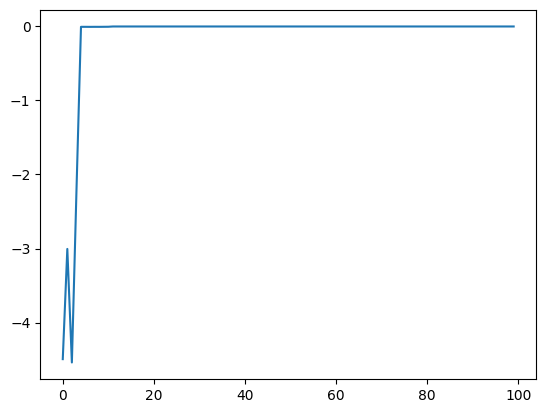

In [27]:
plt.plot(
    -np.array(   # max
        ga.generation_best_Y
    )
)
plt.show()

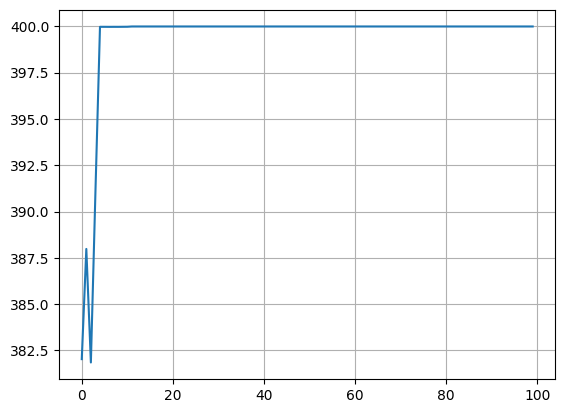

In [28]:
fitness_values = 400 - np.array(ga.generation_best_Y) * 4
plt.plot(fitness_values)
plt.grid(True)
plt.show()

# Inductive reasoning

The shape of an ellipse may be characterized by the ratio of the length of two chords a and b.
Let x = a/b;
then as the ratio a/b -> infinity, the shape of the ellipse tends to a horizontal line, whereas as a/b -> 0, the shape tends to a vertical line. For a/b = 1, the shape is a circle.
Given a set of a/b avlues that have been classified into two classes, divide the variable x = a/b into fuzzy partitions.

Segmentation of x into two arbitrary classes
x=a/b  .0, .1, .15, .2, .2, .5, .9, 1.1, 1.9, 5, 50, 100
class  1,  1,  1,   1,  1,  2,  1,  1,   2,   2, 2,  2

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from math import log

In [30]:
x_values = np.array([
    .0, .1, .15, .2, .2, .5, .9, 1.1, 1.9, 5, 50, 100
])
classes = np.array([
    1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2
])

In [31]:
def calc_entropy(
    x_threshold: float,
    x_data: np.array,
    class_data: np.array,
) -> dict:
    """
    Calculate entropy for a given threshold value

    Args:
        x_threshold: 
        x_data: 
        class_data:

    Returns:
        A dict countaining entropy data
    """
    n_total = len(x_data)

    r1 = x_data <= x_threshold
    r2 = x_data > x_threshold

    # counting region samples
    
    n1 = np.sum(r1)
    n2 = n_total - n1

    n1_c1 = np.sum((r1) & (class_data == 1))
    n1_c2 = np.sum((r1) & (class_data == 2))
    n2_c1 = np.sum((r2) & (class_data == 1))
    n2_c2 = np.sum((r2) & (class_data == 2))

    # calculating suavization probability
    p1 = (n1_c1 + 1) / (n1 + 1) if n1 > 0 else 0
    p2 = (n1_c2 + 1) / (n1 + 1) if n1 > 0 else 0
    q1 = (n2_c1 + 1) / (n2 + 1) if n2 > 0 else 0
    q2 = (n2_c2 + 1) / (n2 + 1) if n2 > 0 else 0

    # region probability
    P = n1 / n_total
    Q = 1 - P

    def calc_partial_entropy(
        p1: float,
        p2: float,
    ) -> float:
        """
        Calculates partial entropy

        Args:
            p1: 
            p2: 

        Returns:
            Partial entropy value
        """
        zero_returns = (0, 1)
        if p1 in zero_returns or p2 in zero_returns:
            return 0
        return -(p1 * log(p1) + p2 * log(p2))

    Sp = calc_partial_entropy(p1, p2)
    Sq = calc_partial_entropy(q1, q2)

    # total_entropy
    S_total = P * Sp + Q * Sq

    return {
        'x_threshold': x_threshold,
        'n1': n1, 'n2': n2,
        'n1_c1': n1_c1, 'n1_c2': n1_c2,
        'n2_c1': n2_c1, 'n2_c2': n2_c2,
        'p1': p1, 'p2': p2, 'q1': q1, 'q2': q2,
        'P': P, 'Q': Q,
        'Sp': Sp, 'Sq': Sq,
        'S': S_total
    }

In [32]:
x_sorted = np.sort(x_values)
x_test = [
    (x_sorted[i] + x_sorted[i+1]) / 2
    for i in range(len(x_sorted)-1)
]
x_test = sorted(set(x_test))
results_1st = [
    calc_entropy(x_t, x_values, classes)
    for x_t in x_test
]

In [33]:
from pprint import pprint
pprint(results_1st)

[{'P': np.float64(0.08333333333333333),
  'Q': np.float64(0.9166666666666666),
  'S': np.float64(0.6059058643984256),
  'Sp': 0,
  'Sq': np.float64(0.6609882157073734),
  'n1': np.int64(1),
  'n1_c1': np.int64(1),
  'n1_c2': np.int64(0),
  'n2': np.int64(11),
  'n2_c1': np.int64(6),
  'n2_c2': np.int64(5),
  'p1': np.float64(1.0),
  'p2': np.float64(0.5),
  'q1': np.float64(0.5833333333333334),
  'q2': np.float64(0.5),
  'x_threshold': np.float64(0.05)},
 {'P': np.float64(0.16666666666666666),
  'Q': np.float64(0.8333333333333334),
  'S': np.float64(0.551032548700287),
  'Sp': 0,
  'Sq': np.float64(0.6612390584403443),
  'n1': np.int64(2),
  'n1_c1': np.int64(2),
  'n1_c2': np.int64(0),
  'n2': np.int64(10),
  'n2_c1': np.int64(5),
  'n2_c2': np.int64(5),
  'p1': np.float64(1.0),
  'p2': np.float64(0.3333333333333333),
  'q1': np.float64(0.5454545454545454),
  'q2': np.float64(0.5454545454545454),
  'x_threshold': np.float64(0.125)},
 {'P': np.float64(0.25),
  'Q': np.float64(0.75),
  

In [34]:
best_1st_result = min(results_1st, key=lambda r: r['S'])
pprint(best_1st_result)

{'P': np.float64(0.6666666666666666),
 'Q': np.float64(0.33333333333333337),
 'S': np.float64(0.2926236354669345),
 'Sp': np.float64(0.4389354532004018),
 'Sq': 0,
 'n1': np.int64(8),
 'n1_c1': np.int64(7),
 'n1_c2': np.int64(1),
 'n2': np.int64(4),
 'n2_c1': np.int64(0),
 'n2_c2': np.int64(4),
 'p1': np.float64(0.8888888888888888),
 'p2': np.float64(0.2222222222222222),
 'q1': np.float64(0.2),
 'q2': np.float64(1.0),
 'x_threshold': np.float64(1.5)}


In [35]:
# 2nd section (negative side)

neg_mask = x_values <= best_1st_result['x_threshold']
x_neg = x_values[neg_mask]
class_neg = classes[neg_mask]

x_neg_sorted = np.sort(x_neg)
x_test_neg = [
    (x_neg_sorted[i] + x_neg_sorted[i+1]) / 2
    for i in range(len(x_neg_sorted)-1)
]
x_test_neg = sorted(set(x_test_neg))

In [36]:
results_neg = [
    calc_entropy(x_t, x_neg, class_neg)
    for x_t in x_test_neg
]

In [37]:
pprint(results_neg)

[{'P': np.float64(0.125),
  'Q': np.float64(0.875),
  'S': np.float64(0.40548686397312617),
  'Sp': 0,
  'Sq': np.float64(0.4634135588264299),
  'n1': np.int64(1),
  'n1_c1': np.int64(1),
  'n1_c2': np.int64(0),
  'n2': np.int64(7),
  'n2_c1': np.int64(6),
  'n2_c2': np.int64(1),
  'p1': np.float64(1.0),
  'p2': np.float64(0.5),
  'q1': np.float64(0.875),
  'q2': np.float64(0.25),
  'x_threshold': np.float64(0.05)},
 {'P': np.float64(0.25),
  'Q': np.float64(0.75),
  'S': np.float64(0.3675460731379592),
  'Sp': 0,
  'Sq': np.float64(0.49006143085061227),
  'n1': np.int64(2),
  'n1_c1': np.int64(2),
  'n1_c2': np.int64(0),
  'n2': np.int64(6),
  'n2_c1': np.int64(5),
  'n2_c2': np.int64(1),
  'p1': np.float64(1.0),
  'p2': np.float64(0.3333333333333333),
  'q1': np.float64(0.8571428571428571),
  'q2': np.float64(0.2857142857142857),
  'x_threshold': np.float64(0.125)},
 {'P': np.float64(0.375),
  'Q': np.float64(0.625),
  'S': np.float64(0.3238367043027075),
  'Sp': 0,
  'Sq': np.float6

In [38]:
best_neg = min(results_neg, key=lambda r: r['S'])
pprint(best_neg)

{'P': np.float64(0.625),
 'Q': np.float64(0.375),
 'S': np.float64(0.2108756792320531),
 'Sp': 0,
 'Sq': np.float64(0.5623351446188083),
 'n1': np.int64(5),
 'n1_c1': np.int64(5),
 'n1_c2': np.int64(0),
 'n2': np.int64(3),
 'n2_c1': np.int64(2),
 'n2_c2': np.int64(1),
 'p1': np.float64(1.0),
 'p2': np.float64(0.16666666666666666),
 'q1': np.float64(0.75),
 'q2': np.float64(0.5),
 'x_threshold': np.float64(0.2)}


In [39]:
# 2nd section (positive side)

pos_mask = x_values > best_1st_result['x_threshold']
x_pos = x_values[pos_mask]
class_pos = classes[pos_mask]

x_pos_sorted = np.sort(x_pos)
x_test_pos = [
    (x_pos_sorted[i] + x_pos_sorted[i+1]) / 2
    for i in range(len(x_pos_sorted)-1)
]
x_test_pos = sorted(set(x_test_pos))

In [40]:
results_pos = [
    calc_entropy(x_t, x_pos, class_pos)
    for x_t in x_test_pos
]
pprint(results_pos)

[{'P': np.float64(0.25),
  'Q': np.float64(0.75),
  'S': np.float64(0.0),
  'Sp': 0,
  'Sq': 0,
  'n1': np.int64(1),
  'n1_c1': np.int64(0),
  'n1_c2': np.int64(1),
  'n2': np.int64(3),
  'n2_c1': np.int64(0),
  'n2_c2': np.int64(3),
  'p1': np.float64(0.5),
  'p2': np.float64(1.0),
  'q1': np.float64(0.25),
  'q2': np.float64(1.0),
  'x_threshold': np.float64(3.45)},
 {'P': np.float64(0.5),
  'Q': np.float64(0.5),
  'S': np.float64(0.0),
  'Sp': 0,
  'Sq': 0,
  'n1': np.int64(2),
  'n1_c1': np.int64(0),
  'n1_c2': np.int64(2),
  'n2': np.int64(2),
  'n2_c1': np.int64(0),
  'n2_c2': np.int64(2),
  'p1': np.float64(0.3333333333333333),
  'p2': np.float64(1.0),
  'q1': np.float64(0.3333333333333333),
  'q2': np.float64(1.0),
  'x_threshold': np.float64(27.5)},
 {'P': np.float64(0.75),
  'Q': np.float64(0.25),
  'S': np.float64(0.0),
  'Sp': 0,
  'Sq': 0,
  'n1': np.int64(3),
  'n1_c1': np.int64(0),
  'n1_c2': np.int64(3),
  'n2': np.int64(1),
  'n2_c1': np.int64(0),
  'n2_c2': np.int64(1

In [41]:
best_pos = min(results_pos, key=lambda r: r['S'])
pprint(best_pos)

{'P': np.float64(0.25),
 'Q': np.float64(0.75),
 'S': np.float64(0.0),
 'Sp': 0,
 'Sq': 0,
 'n1': np.int64(1),
 'n1_c1': np.int64(0),
 'n1_c2': np.int64(1),
 'n2': np.int64(3),
 'n2_c1': np.int64(0),
 'n2_c2': np.int64(3),
 'p1': np.float64(0.5),
 'p2': np.float64(1.0),
 'q1': np.float64(0.25),
 'q2': np.float64(1.0),
 'x_threshold': np.float64(3.45)}


In [42]:
# Defining membership results

first = best_1st_result['x_threshold']
sec_neg = best_neg['x_threshold']
sec_pos = best_pos['x_threshold']

range_1 = (min(x_values), sec_neg)    # a lot vertical
range_2 = (sec_neg, first)            # vertical
range_3 = (first, sec_pos)            # horizontal
range_4 = (sec_pos, max(x_values))    # a lot horizontal

pprint(
    {
        'a lot vertical': range_1,
        'vertical': range_2,
        'horizontal': range_3,
        'a lot horizontal': range_4
    }
)

{'a lot horizontal': (np.float64(3.45), np.float64(100.0)),
 'a lot vertical': (np.float64(0.0), np.float64(0.2)),
 'horizontal': (np.float64(1.5), np.float64(3.45)),
 'vertical': (np.float64(0.2), np.float64(1.5))}


In [43]:
def trapmf(
    x: float,
    a: float,
    b: float,
    c: float,
    d: float,
) -> float:
    """
    Trapezoidal membership function
    """
    if x <= a:
        return .0
    elif a < x <= b:
        return (x - a) / (b - a)
    elif b < x <= c:
        return 1.0
    elif c < x < d:
        return (d - x) / (d - c)
    else:
        return .0

In [46]:
x_plot = np.linspace(
    min(x_values) * .9,
    max(x_values) * 1.1,
    1_000
)

mf1 = [
    trapmf(x_i, range_1[0]-.1, range_1[0], sec_neg, first)
    for x_i in x_plot
]
mf2 = [
    trapmf(x_i, sec_neg, first, first, sec_pos)
    for x_i in x_plot
]
mf3 = [
    trapmf(x_i, first, sec_pos, sec_pos, max(x_values)+10)
    for x_i in x_plot
]
mf4 = [
    trapmf(x_i, sec_pos, max(x_values), max(x_values)+10, max(x_values)+20)
    for x_i in x_plot
]

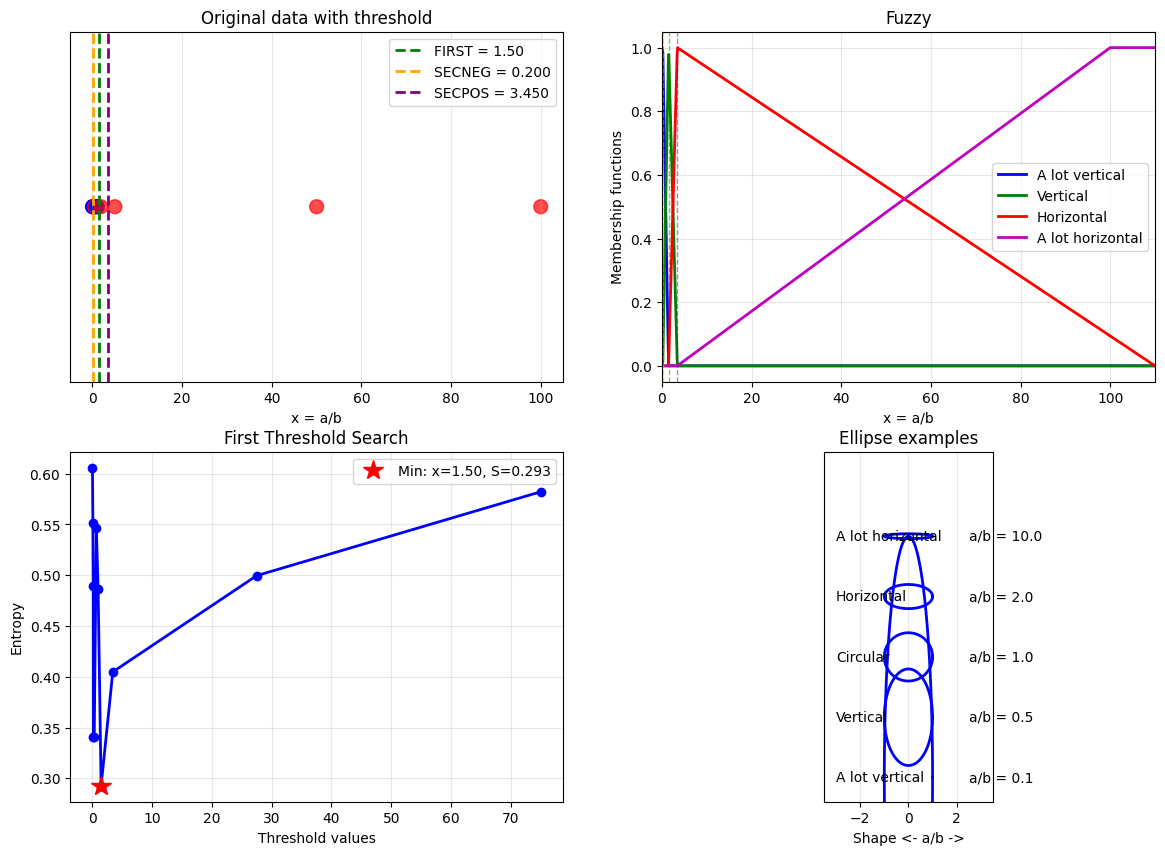

In [68]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original Data

ax1 = axes[0, 0]
colors = ['blue' if c == 1 else 'red' for c in classes]
ax1.scatter(x_values, np.zeros_like(x_values), c=colors, s=100, alpha=.7)
ax1.axvline(x=first, color='green', linestyle='--', linewidth=2, label=f'FIRST = {first:.2f}')
ax1.axvline(x=sec_neg, color='orange', linestyle='--', linewidth=2, label=f'SECNEG = {sec_neg:.3f}')
ax1.axvline(x=sec_pos, color='purple', linestyle='--', linewidth=2, label=f'SECPOS = {sec_pos:.3f}')
ax1.set_xlabel('x = a/b')
ax1.set_title('Original data with threshold')
ax1.legend()
ax1.grid(True, alpha=.3)
ax1.set_ylim(-.1, .1)
ax1.set_yticks([])

# Membership functions

ax2 = axes[0, 1]
ax2.plot(x_plot, mf1, 'b-', linewidth=2, label='A lot vertical')
ax2.plot(x_plot, mf2, 'g-', linewidth=2, label='Vertical')
ax2.plot(x_plot, mf3, 'r-', linewidth=2, label='Horizontal')
ax2.plot(x_plot, mf4, 'm-', linewidth=2, label='A lot horizontal')
ax2.axvline(x=first, color='green', linestyle='--', linewidth=1, alpha=.5)
ax2.axvline(x=sec_neg, color='orange', linestyle='--', linewidth=1, alpha=.5)
ax2.axvline(x=sec_pos, color='purple', linestyle='--', linewidth=1, alpha=.5)
ax2.set_xlabel('x = a/b')
ax2.set_ylabel('Membership functions')
ax2.set_title('Fuzzy')
ax2.legend()
ax2.grid(True, alpha=.3)
ax2.set_xlim(min(x_plot), max(x_plot))

# Entropy evolution

ax3 = axes[1, 0]
x_test_values = [r['x_threshold'] for r in results_1st]
entropy_values = [r['S'] for r in results_1st]
ax3.plot(x_test_values, entropy_values, 'bo-', linewidth=2, markersize=6)
ax3.plot(best_1st_result['x_threshold'], best_1st_result['S'], 'r*', markersize=15, label=f"Min: x={best_1st_result['x_threshold']:.2f}, S={best_1st_result['S']:.3f}")
ax3.set_xlabel('Threshold values')
ax3.set_ylabel('Entropy')
ax3.set_title('First Threshold Search')
ax3.legend()
ax3.grid(True, alpha=.3)

# Ellipses examples

ax4 = axes[1, 1]
ratios_examples = [.1, .5, 1.0, 2.0, 10.0]
titles = ['A lot vertical', 'Vertical', 'Circular', 'Horizontal', 'A lot horizontal']
for i, ratio in enumerate(ratios_examples):
    # norm. coord.
    y_offset = i * 2.5
    a = 1.0
    b = a / ratio if ratio > 0 else 10
    # drawing ellipses
    theta = np.linspace(0, 2 * np.pi, 100)
    x_ellipse = a * np.cos(theta)
    y_ellipse = b * np.sin(theta) + y_offset

    ax4.plot(x_ellipse, y_ellipse, 'b-', linewidth=2)
    ax4.text(2.5, y_offset, f'a/b = {ratio:.1f}', fontsize=10, verticalalignment='center')
    ax4.text(-3, y_offset, titles[i], fontsize=10, verticalalignment='center')
ax4.set_xlim(-3.5, 3.5)
ax4.set_ylim(-1, len(ratios_examples) * 2.5 + 1)
ax4.set_aspect('equal')
ax4.set_title('Ellipse examples')
ax4.set_xlabel('Shape <- a/b ->')
ax4.set_yticks([])
ax4.grid(True, alpha=.3)